# El método del codo y el factor de la silueta del clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

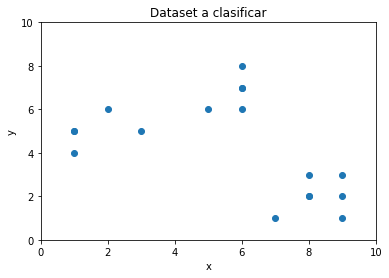

In [6]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

# El coeficiente de la silueta

In [10]:
import matplotlib
cmap = matplotlib.cm.get_cmap("Spectral")
cmap

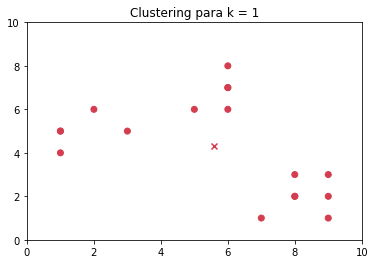

* Para k = 2 el promedio de la silueta es 0.6113424368705715
 - Para i = 0, la silueta del cluster vale 0.7746251901389686
 - Para i = 1, la silueta del cluster vale 0.49704450958269375


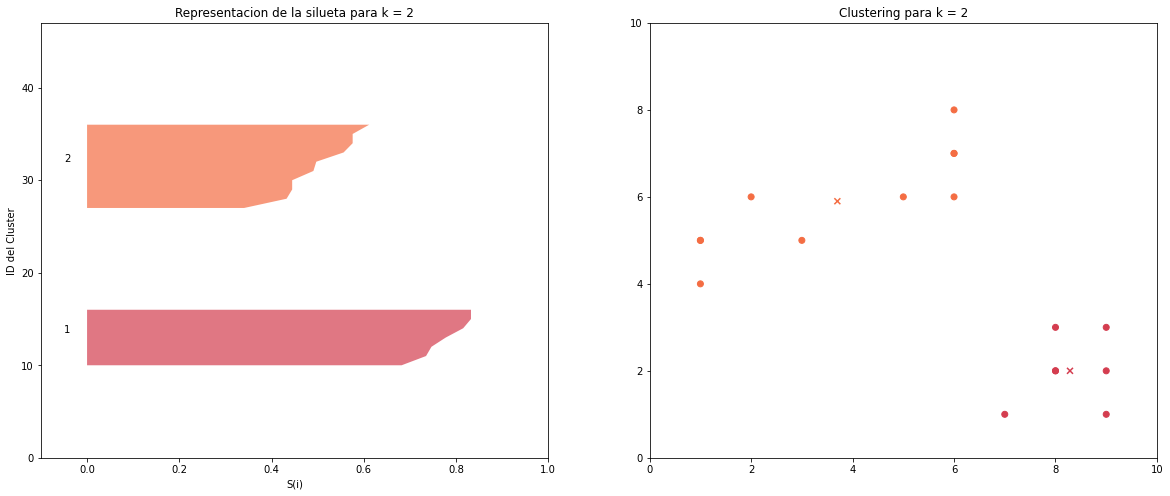

* Para k = 3 el promedio de la silueta es 0.7122079383287169
 - Para i = 0, la silueta del cluster vale 0.6609508863896014
 - Para i = 1, la silueta del cluster vale 0.7345257364682265
 - Para i = 2, la silueta del cluster vale 0.7322200728725188


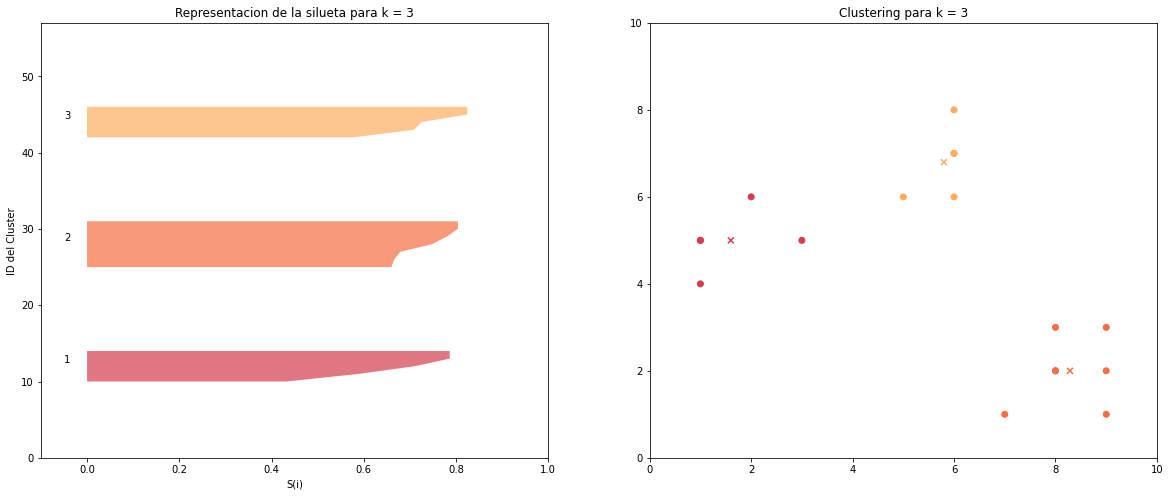

* Para k = 4 el promedio de la silueta es 0.5010469035090873
 - Para i = 0, la silueta del cluster vale 0.6609508863896014
 - Para i = 1, la silueta del cluster vale 0.2698039021743969
 - Para i = 2, la silueta del cluster vale 0.728802070766583
 - Para i = 3, la silueta del cluster vale 0.1899052168375926


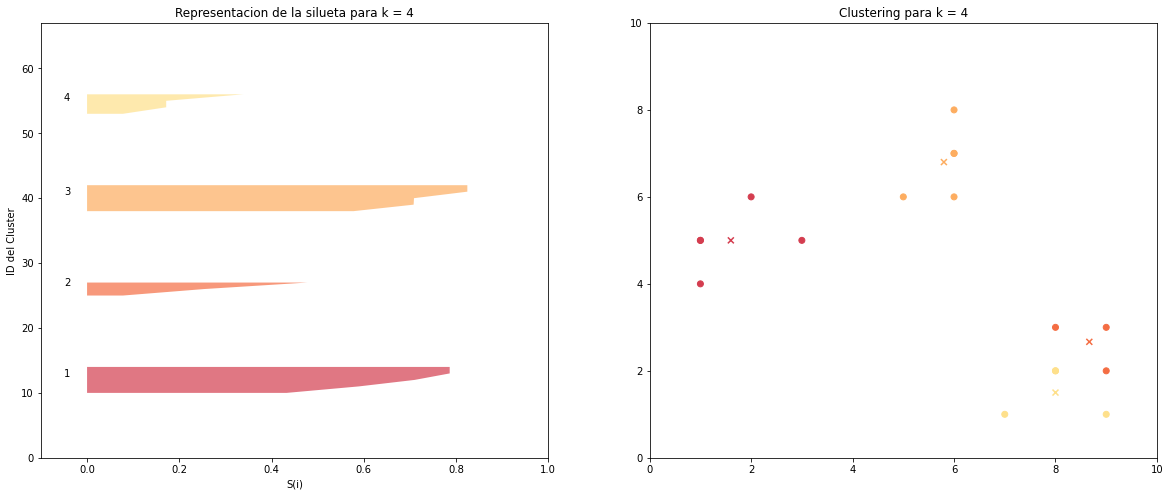

* Para k = 5 el promedio de la silueta es 0.42883912423017356
 - Para i = 0, la silueta del cluster vale 0.24096929517637128
 - Para i = 1, la silueta del cluster vale 0.2698039021743969
 - Para i = 2, la silueta del cluster vale 0.654458796162702
 - Para i = 3, la silueta del cluster vale 0.1899052168375926
 - Para i = 4, la silueta del cluster vale 0.655666655624379


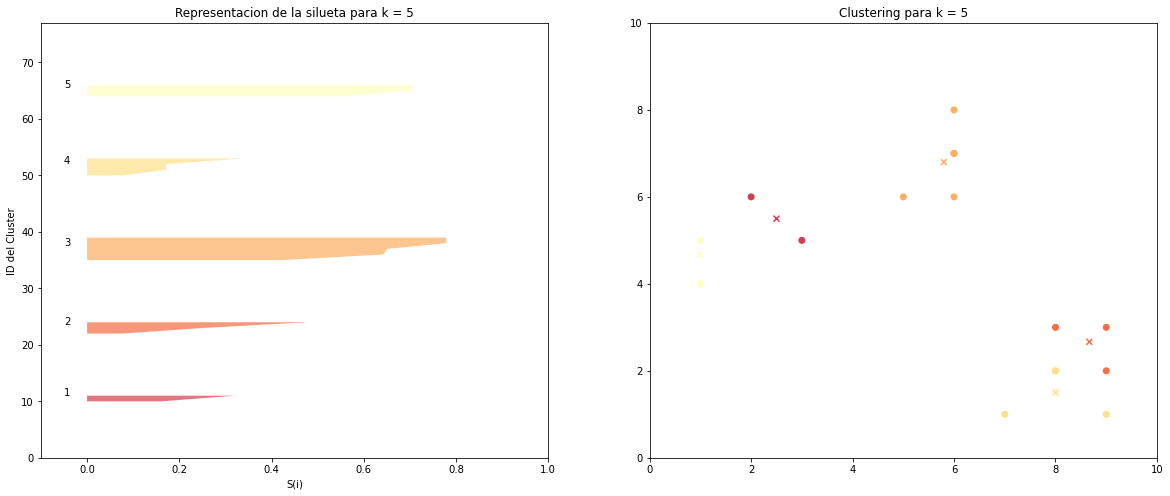

* Para k = 6 el promedio de la silueta es 0.4421681922609326
 - Para i = 0, la silueta del cluster vale 0.654458796162702
 - Para i = 1, la silueta del cluster vale 0.263812295212263
 - Para i = 2, la silueta del cluster vale 0.655666655624379
 - Para i = 3, la silueta del cluster vale 0.31700053499298475
 - Para i = 4, la silueta del cluster vale 0.0
 - Para i = 5, la silueta del cluster vale 0.24096929517637128


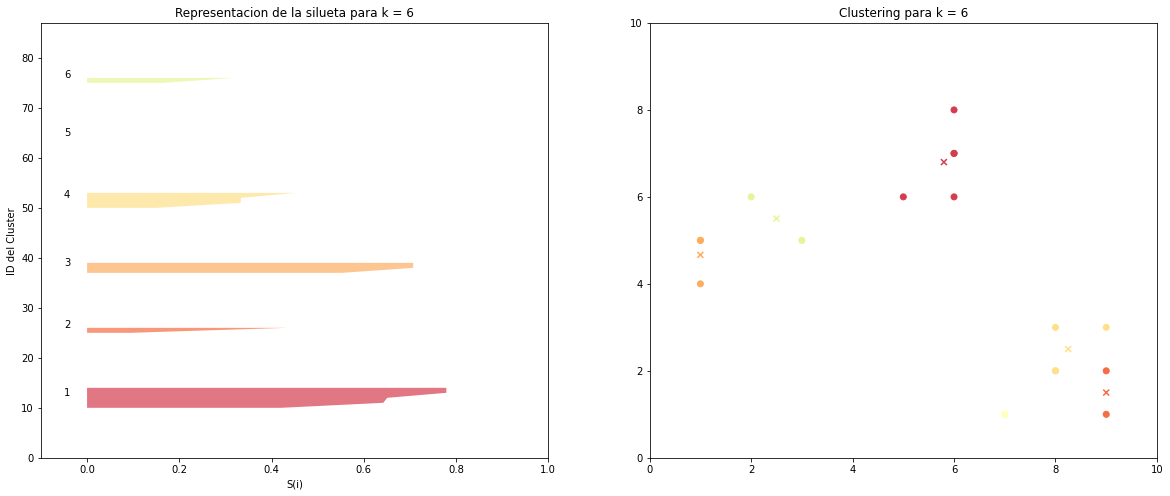

* Para k = 7 el promedio de la silueta es 0.31262671012368176
 - Para i = 0, la silueta del cluster vale 0.0
 - Para i = 1, la silueta del cluster vale 0.24096929517637128
 - Para i = 2, la silueta del cluster vale 0.30272654110449826
 - Para i = 3, la silueta del cluster vale 0.027847735322324364
 - Para i = 4, la silueta del cluster vale 0.655666655624379
 - Para i = 5, la silueta del cluster vale 0.5237553814972481
 - Para i = 6, la silueta del cluster vale 0.0


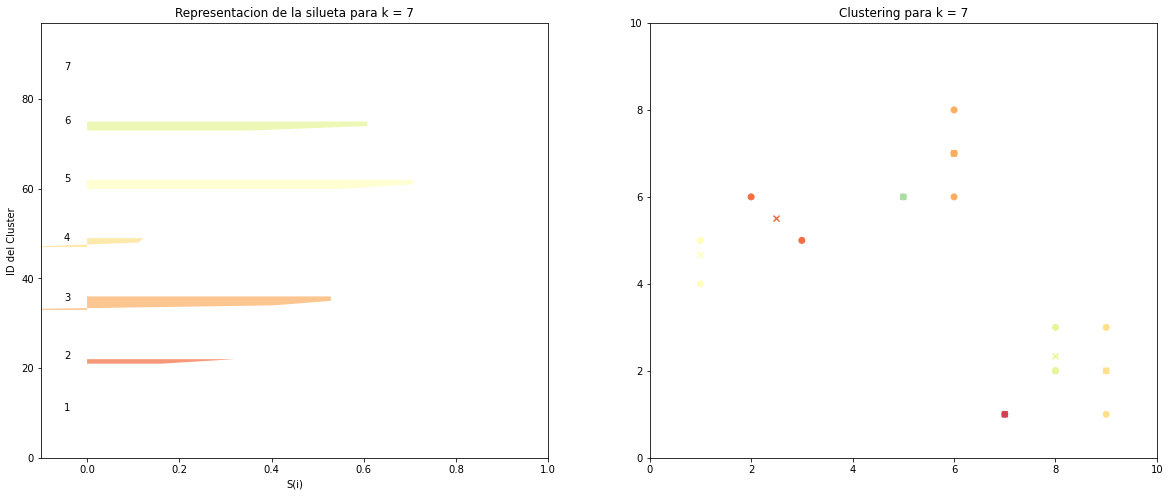

* Para k = 8 el promedio de la silueta es 0.3846391401618392
 - Para i = 0, la silueta del cluster vale 0.2751262658470836
 - Para i = 1, la silueta del cluster vale 0.0
 - Para i = 2, la silueta del cluster vale 0.5664789734180768
 - Para i = 3, la silueta del cluster vale 0.3869086846339371
 - Para i = 4, la silueta del cluster vale 0.6152265411044983
 - Para i = 5, la silueta del cluster vale 0.0
 - Para i = 6, la silueta del cluster vale 0.31256470041698214
 - Para i = 7, la silueta del cluster vale 0.32882042637679976


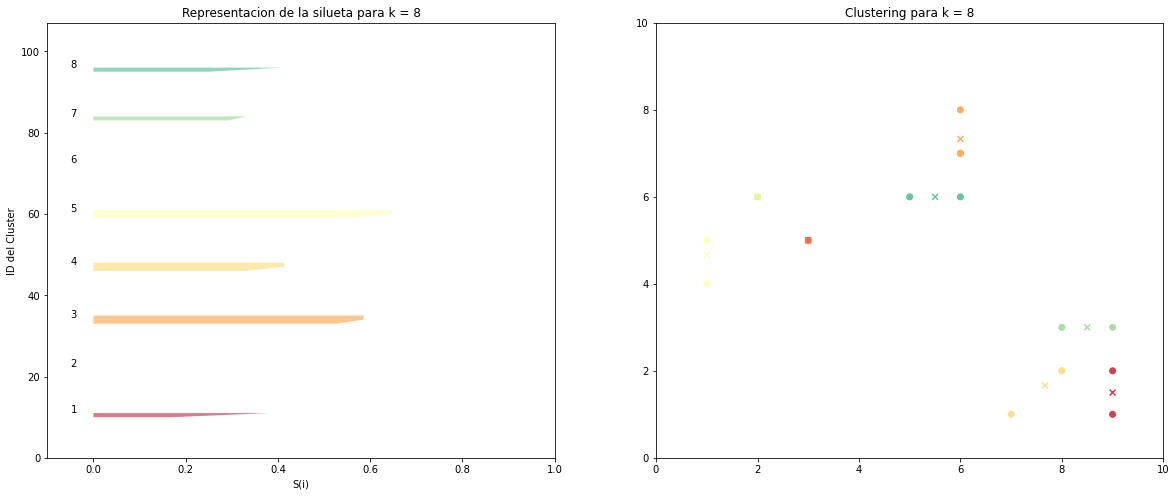

* Para k = 9 el promedio de la silueta es 0.39932610787930767
 - Para i = 0, la silueta del cluster vale 0.5664789734180768
 - Para i = 1, la silueta del cluster vale 0.14644660940672627
 - Para i = 2, la silueta del cluster vale 0.6152265411044983
 - Para i = 3, la silueta del cluster vale 0.32882042637679976
 - Para i = 4, la silueta del cluster vale 1.0
 - Para i = 5, la silueta del cluster vale 0.0
 - Para i = 6, la silueta del cluster vale 0.0
 - Para i = 7, la silueta del cluster vale 0.14644660940672627
 - Para i = 8, la silueta del cluster vale 0.0


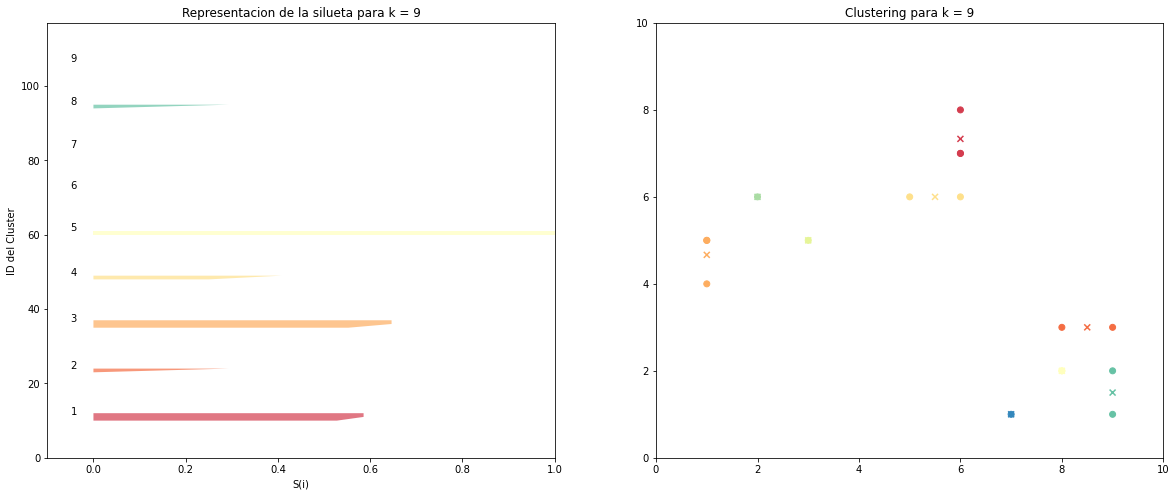

In [20]:
max_k = 10
K = range(1,max_k)
ssw=[]
color_palette=[cmap(float(i)/max_k) for i in K]
centroid = [sum(X) / len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis=1))

for k in K:
    kmeanModel=KMeans(n_clusters=k).fit(X)
    centers=pd.DataFrame(kmeanModel.cluster_centers_)
    #print(centers)
    #print(centers[1].values[0])
    labels=kmeanModel.labels_
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1))
    ssw.append(ssw_k)
    label_color = [color_palette[i] for i in labels]
    ## Silueta para cada cluster
    if 1<k<len(X):
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        # Siluete puede tener valores [-1, 1]
        # En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1,1.])
        # El num de clusters a insertar determinará el tamaño de cada barra
        # El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos
        # entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0,len(X)+(k+1)*10])
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = {} el promedio de la silueta es {}".format(k,silhouette_avg))
        # valor del coeficiente silueta para cada cluster
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower=10
        for i in range(k):
            # Agregamos la silueta del cluster ith de valor k de clusters
            # array de las siluetas de todos los elementos contenidos en el cluster ith
            ith_cluster_sv = sample_silhouette_values[labels==i] 
            print(" - Para i = {}, la silueta del cluster vale {}".format(i,np.mean(ith_cluster_sv)))
            #orden descendente de las siluetas del cluster ith
            ith_cluster_sv.sort()
            
            ith_cluster_size=ith_cluster_sv.shape[0]
            y_upper = y_lower+ith_cluster_size
            
            color=color_palette[i]
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor=color, alpha=.7)
            axis1.text(-0.05,y_lower+0.5*ith_cluster_size, str(i+1))
            y_lower=y_upper+10
        axis1.set_title("Representacion de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2,c=label_color)
    plt.scatter(centers[0].values,centers[1].values,c=color_palette[:k], marker="x")
    plt.show()

# Elbow Method

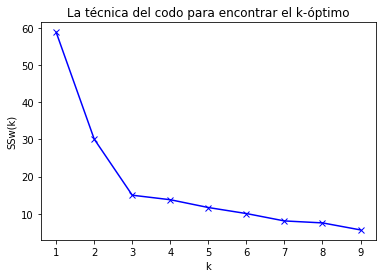

In [21]:
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k-óptimo")
plt.show()

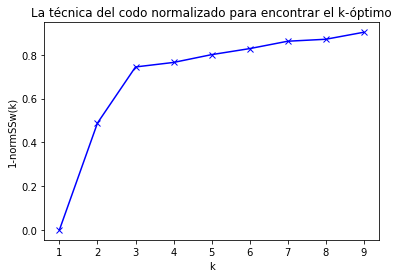

In [22]:
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1-normSSw(k)")
plt.title("La técnica del codo normalizado para encontrar el k-óptimo")
plt.show()